<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/Data/STATISTICS_OF_df_imputed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STATISTICS OF df_imputed**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Reading the data set from the drive
df = pd.read_csv("/content/drive/MyDrive/FPD/df_imputed.csv")

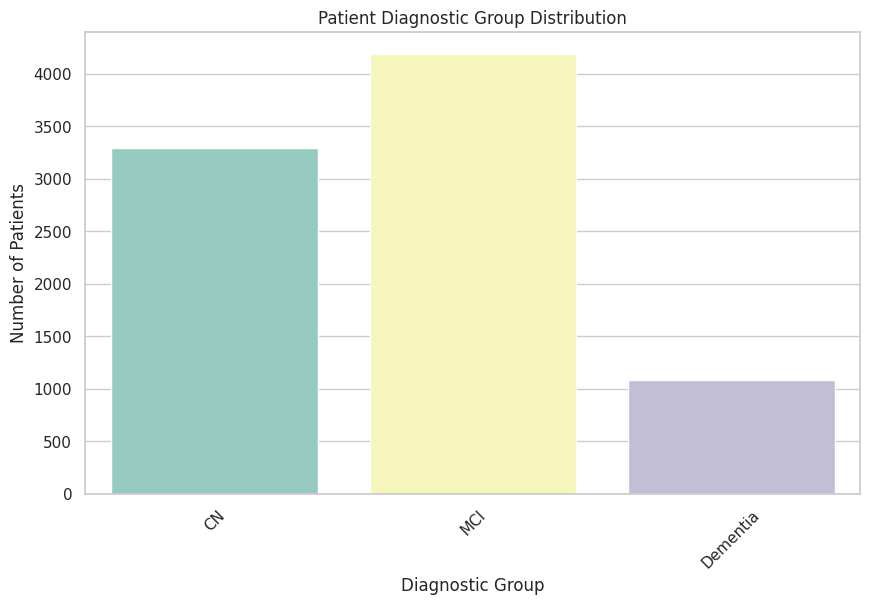

Diagnostic Group Counts:
MCI         4190
CN          3290
Dementia    1086
Name: DX, dtype: int64
Total number of meetings: 8566
Total number of patients: 1495


In [9]:
# Count the number of patients in each diagnostic group, including missing values as 'NAN'
diagnostic_counts = df['DX'].fillna('NAN').value_counts()

# Define the order of diagnostic groups for the bar plot
diagnostic_order = ['CN', 'MCI', 'Dementia']

# Calculate the total number of meetings (total rows in the DataFrame)
total_meetings = len(df)

# Create a bar plot for the diagnostic group counts with the specified order
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=diagnostic_counts.index, y=diagnostic_counts.values, order=diagnostic_order, palette="Set3")
plt.xlabel('Diagnostic Group')
plt.ylabel('Number of Patients')
plt.title('Patient Diagnostic Group Distribution')
plt.xticks(rotation=45)
plt.show()

# Print the diagnostic group counts (including 'NAN')
print("Diagnostic Group Counts:")
print(diagnostic_counts)

# Calculate the total number of unique patients
total_patients = df['RID'].nunique()

# Print the total number of meetings
print(f"Total number of meetings: {total_meetings}")
# Print the total number of patients
print(f"Total number of patients: {total_patients}")


## Statistics of transitions in df_imputed

In [10]:
# Function to convert VISCODE to months
def viscode_to_month(viscode):
    return int(viscode[1:]) if viscode.startswith('m') else 0

# Replace VISCODE with integer values
df['VISCODE'] = df['VISCODE'].apply(viscode_to_month)

CNtoCN: 549
CNtoMCI: 90
CNtoAD: 24
MCItoMCI: 482
MCItoAD: 350
ADtoAD: 0
Other: 0


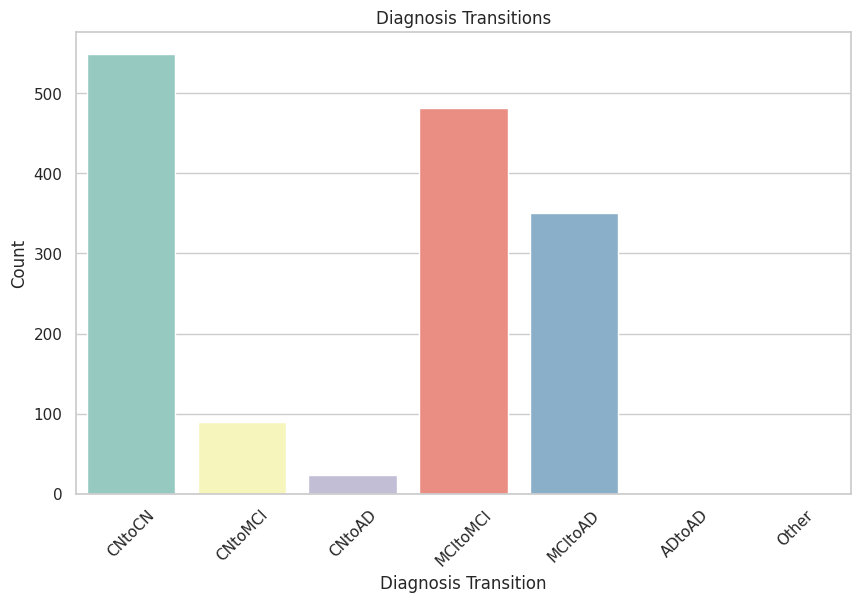

In [11]:
import pandas as pd

# Sort the DataFrame by 'RID' and 'VISCODE' to ensure data is in chronological order
df.sort_values(by=['RID', 'VISCODE'], inplace=True)

# Create a dictionary to store the first and last diagnoses for each patient
first_diagnoses = {}
last_diagnoses = {}

# Iterate through the DataFrame to find the first and last diagnoses
for rid, group in df.groupby('RID'):
    first_diagnoses[rid] = group.iloc[0]['DX']
    last_diagnoses[rid] = group.iloc[-1]['DX']

# Initialize variables to count diagnosis transitions
transitions = {
    'CNtoCN': 0,
    'CNtoMCI': 0,
    'CNtoAD': 0,
    'MCItoMCI': 0,
    'MCItoAD': 0,
    'ADtoAD': 0,
    'Other': 0,
}

# Calculate the diagnosis transitions and update the counters
for rid, first_dx in first_diagnoses.items():
    last_dx = last_diagnoses[rid]
    if first_dx == 'CN':
        if last_dx == 'CN':
            transitions['CNtoCN'] += 1
        elif last_dx == 'MCI':
            transitions['CNtoMCI'] += 1
        elif last_dx == 'Dementia':
            transitions['CNtoAD'] += 1
        else:
            transitions['Other'] += 1
    elif first_dx == 'MCI':
        if last_dx == 'MCI':
            transitions['MCItoMCI'] += 1
        elif last_dx == 'Dementia':
            transitions['MCItoAD'] += 1
        else:
            transitions['Other'] += 1
    elif first_dx == 'Dementia':
        if last_dx == 'Dementia':
            transitions['ADtoAD'] += 1
        else:
            transitions['Other'] += 1
    else:
        transitions['Other'] += 1

# Print the statistics of diagnosis transitions
for transition, count in transitions.items():
    print(f"{transition}: {count}")

# Optional: You can visualize the transitions using a bar plot
import matplotlib.pyplot as plt



# Create a bar plot for the diagnosis transitions
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=list(transitions.keys()), y=list(transitions.values()), palette="Set3")
plt.xlabel('Diagnosis Transition')
plt.ylabel('Count')
plt.title('Diagnosis Transitions')
plt.xticks(rotation=45)
plt.show()



